In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("F:\onlinefraud.csv")

In [8]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [14]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [18]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
# Columns with text data
text_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each text column
for col in text_columns:
    df[col] = encoder.fit_transform(df[col])


In [22]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
# Select float columns
float_columns = df.select_dtypes(include=['float']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the float columns
df[float_columns] = scaler.fit_transform(df[float_columns])

# Convert scaled values to integers
df[float_columns] = df[float_columns].astype(int)

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,0,757869,0,0,1662094,0,0,0,0
1,1,3,0,2188998,0,0,1733924,0,0,0,0
2,1,4,0,1002156,0,0,439685,0,0,1,0
3,1,1,0,5828262,0,0,391696,0,0,1,0
4,1,3,0,3445981,0,0,828919,0,0,0,0


# logistic regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"])  # Drop the target column
y = df["isFlaggedFraud"]  # Target column

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999976424806133
Confusion Matrix:
 [[1272521       0]
 [      3       0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



# Decision Tree

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"], axis=1)  # Drop the target column
y = df["isFlaggedFraud"]  # Target column

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for decision trees, but useful if you're comparing with other models)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999968566408177
Confusion Matrix:
 [[1272519       2]
 [      2       1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.33      0.33      0.33         3

    accuracy                           1.00   1272524
   macro avg       0.67      0.67      0.67   1272524
weighted avg       1.00      1.00      1.00   1272524



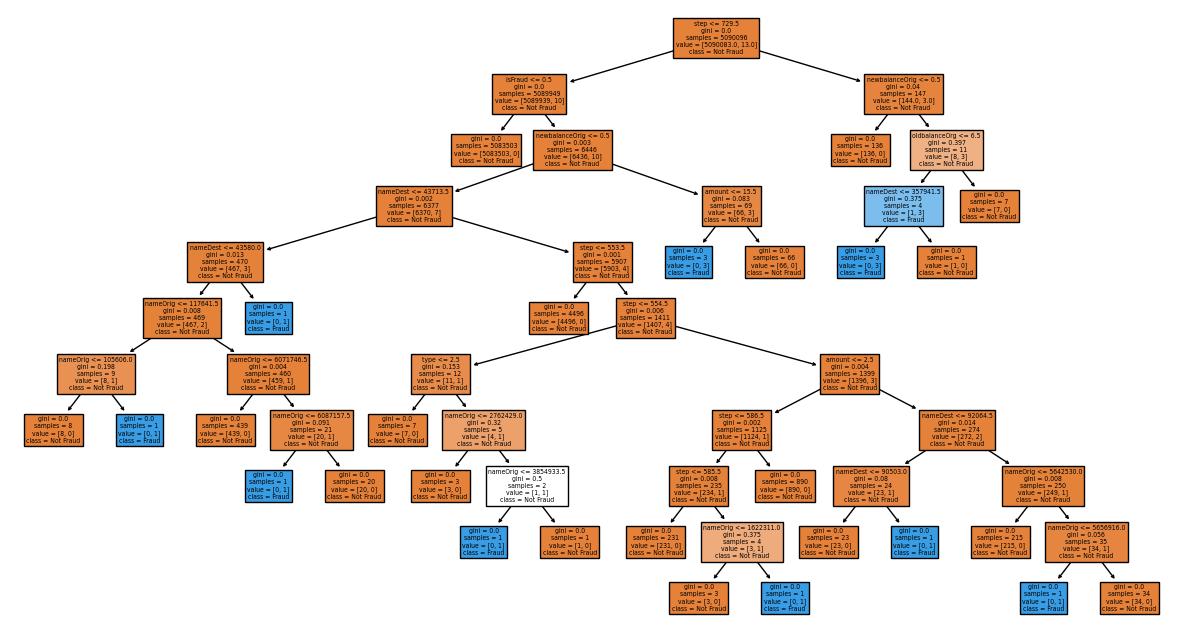

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=X.columns, class_names=["Not Fraud", "Fraud"], filled=True)
plt.show()

# Random forest

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"])  # Drop the target column
y = df["isFlaggedFraud"]  # Target column

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42, class_weight="balanced")

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999976424806133
Confusion Matrix:
 [[1272521       0]
 [      3       0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



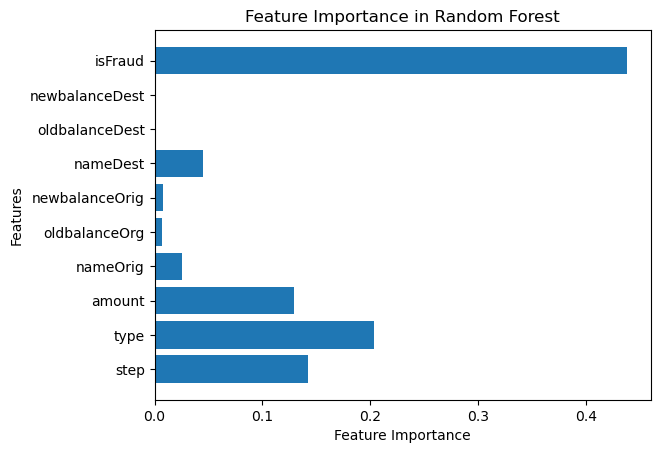

In [39]:
feature_importances = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

# Ada Boost

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"])  # Drop the target column
y = df["isFlaggedFraud"]  # Target column

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999984283204089
Confusion Matrix:
 [[1272521       0]
 [      2       1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       1.00      0.33      0.50         3

    accuracy                           1.00   1272524
   macro avg       1.00      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



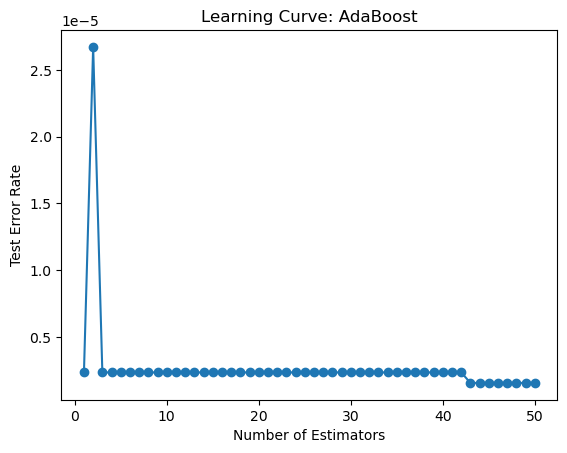

In [44]:
import matplotlib.pyplot as plt

errors = [1 - score for score in model.staged_score(X_test, y_test)]
plt.plot(range(1, len(errors) + 1), errors, marker="o")
plt.xlabel("Number of Estimators")
plt.ylabel("Test Error Rate")
plt.title("Learning Curve: AdaBoost")
plt.show()

# XG Boost

In [49]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"])  
y = df["isFlaggedFraud"]  

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
model = XGBClassifier(
    n_estimators=100,           # Number of boosting rounds
    learning_rate=0.1,          # Step size shrinkage
    max_depth=6,                # Maximum depth of trees
    random_state=42,            # For reproducibility
    use_label_encoder=False,    # Disable label encoder warning
    eval_metric="logloss"       # Evaluation metric
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999976424806133
Confusion Matrix:
 [[1272521       0]
 [      3       0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



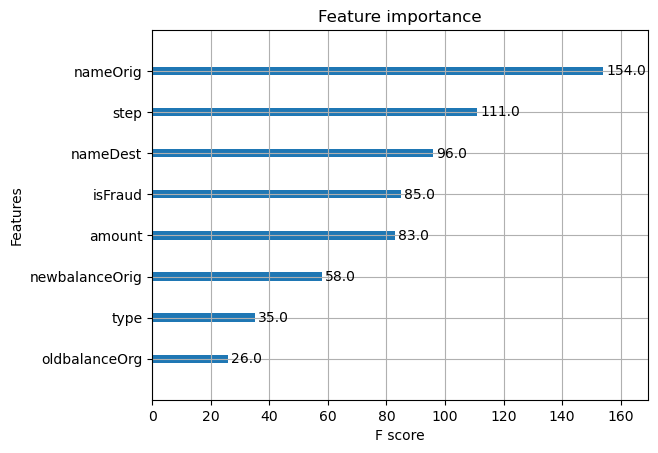

In [53]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

# Gradient Boosting

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"])  
y = df["isFlaggedFraud"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(
    n_estimators=100,      # Number of boosting stages
    learning_rate=0.1,     # Shrinks contribution of each tree
    max_depth=3,           # Maximum depth of individual estimators
    random_state=42        # For reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9999662088887911
Confusion Matrix:
 [[1272478      43]
 [      0       3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.07      1.00      0.12         3

    accuracy                           1.00   1272524
   macro avg       0.53      1.00      0.56   1272524
weighted avg       1.00      1.00      1.00   1272524



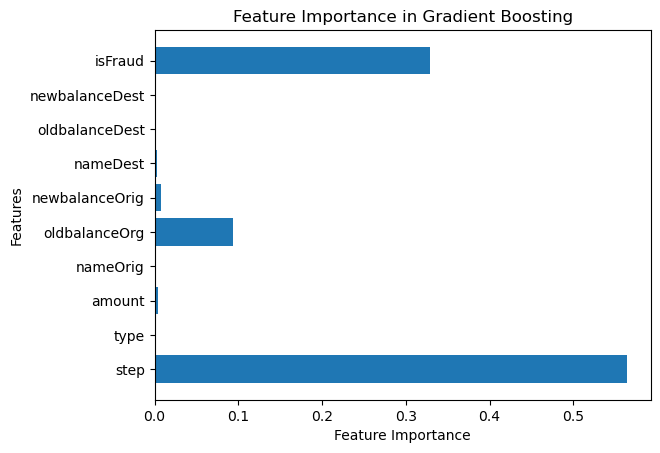

In [61]:
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Gradient Boosting")
plt.show()

# KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Features (X) and Target (y)
X = df.drop(columns=["isFlaggedFraud"])  
y = df["isFlaggedFraud"]  

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the KNN Classifier
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Default: Euclidean distance

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    accuracies.append(scores.mean())

plt.plot(range(1, 21), accuracies)
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("Optimal Number of Neighbors")
plt.show()